<a href="https://colab.research.google.com/github/Emna-chebbi/student-performance/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student performance dataset project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

In [7]:
! pip install kaggle
if not os.path.exists('/content/.kaggle'):
    os.makedirs('/content/.kaggle')

In [8]:
if not os.path.exists('/content/.kaggle/kaggle.json'):
    print("Uploading Kaggle API key")
    files.upload()
! cp /content/.kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Uploading Kaggle API key


Saving kaggle.json to kaggle.json
cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
! kaggle datasets download lainguyn123/student-performance-factors -p /content

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 67.1MB/s]


In [10]:
! unzip -q /content/student-performance-factors.zip -d /content/student_performance_data

In [11]:
data_path = '/content/student_performance_data/StudentPerformanceFactors.csv'
if os.path.exists(data_path):
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
    display(data.head())
else:
    print("Dataset file not found.")

Dataset loaded successfully.


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(6607, 20)

In [16]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [17]:
data.drop('Teacher_Quality',axis=1, inplace=True)

In [19]:
#Selecting sensitive columns
sensitive_features = data[['Gender', 'Family_Income',
'Parental_Education_Level', 'School_Type', 'Distance_from_Home']]
sensitive_features.head()

,Gender,Family_Income,Parental_Education_Level,School_Type,Distance_from_Home
0,Male,Low,High School,Public,Near
1,Female,Medium,College,Public,Moderate
2,Male,Medium,Postgraduate,Public,Near
3,Male,Medium,High School,Public,Moderate
4,Female,Medium,College,Public,Near


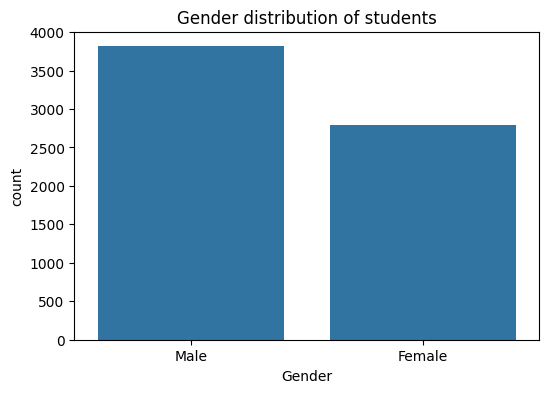

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=sensitive_features, x='Gender')
plt.title("Gender distribution of students")
plt.show()

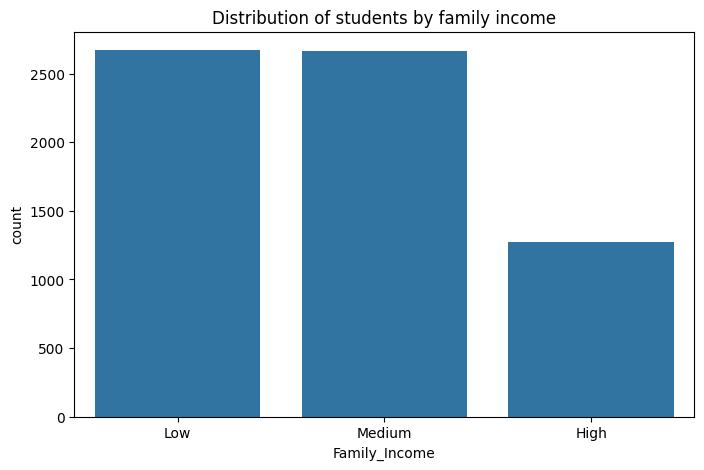

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=sensitive_features, x='Family_Income')
plt.title("Distribution of students by family income")
plt.show()

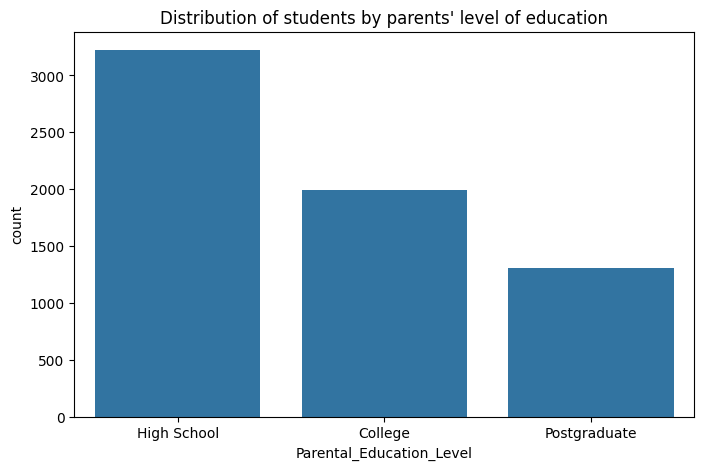

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=sensitive_features,
x='Parental_Education_Level')
plt.title("Distribution of students by parents' level of education")
plt.show()

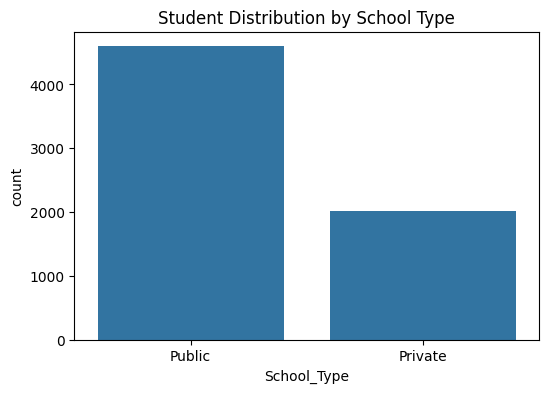

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=sensitive_features, x='School_Type')
plt.title("Student Distribution by School Type")
plt.show()

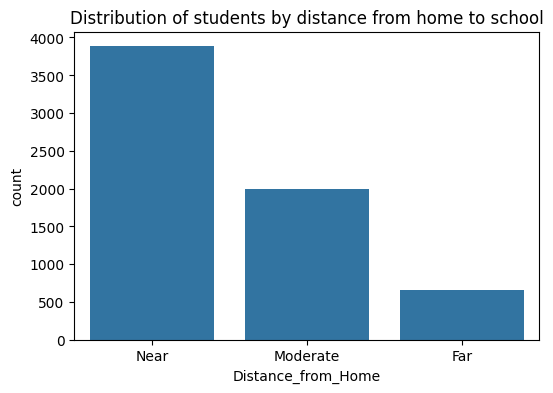

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=sensitive_features, x='Distance_from_Home')
plt.title("Distribution of students by distance from home to school")
plt.show()